### Ensemble learning is technique that where weak models are trained on data and then combind to make a single strong model 

In [1]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")

/Users/insecupa/Documents/Coding/AiCoding/AiGenAiLearnJourney/ailearnenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
print("Path to dataset files:", path)

Path to dataset files: /Users/insecupa/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [4]:
titanic = pd.read_csv(path + "/Titanic-Dataset.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

/var/folders/l4/jflj14k17pg47nd_5mz4rfx00000gn/T/ipykernel_2671/2090679368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)


In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 640x480 with 0 Axes>

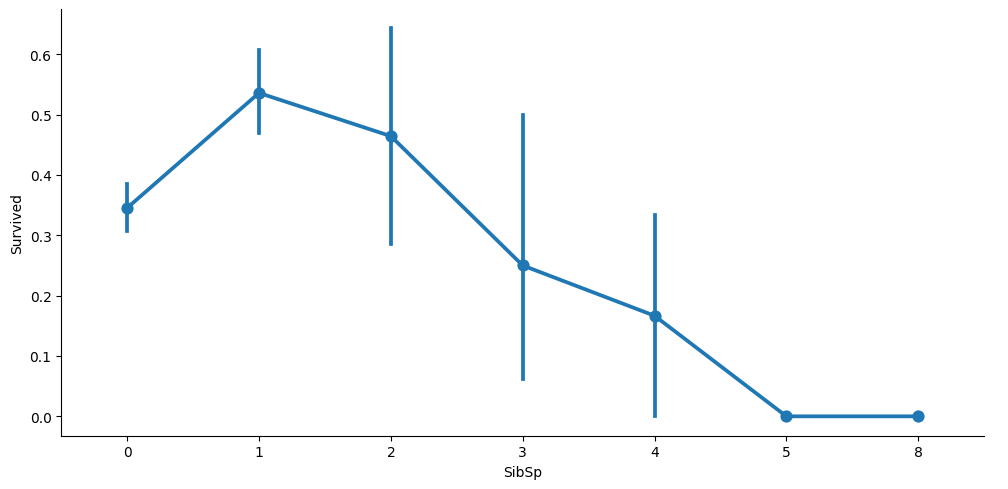

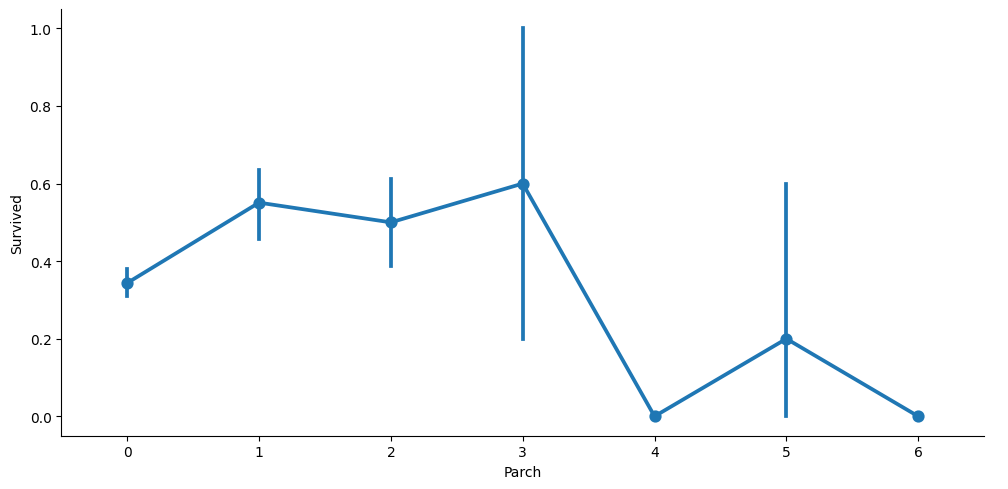

In [9]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = titanic, kind = 'point', aspect= 2,)

In [11]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
titanic.drop(['SibSp', 'PassengerId', 'Parch'], axis = 1, inplace = True)

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [18]:
titanic.select_dtypes(include = 'object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [20]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [21]:
pd.get_dummies(titanic['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [22]:
gender_num = {'male' : 0, 'female' : 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)


In [23]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [24]:
titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [26]:
#Splitting data

In [29]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

## Types of Ensemble Learning 

1. Boosting - Sequentially make the models learn from one after the another, then combined in summing or averaging process
2. Bagging - Parallel learning and then combined in deterministic way
3. Stacking - Sequential learning but the output of these models are used as input to a metamodel to generate final output

For boosting and bagging the type of the weaker models are the same and cannot be different, but for Stacking the models can be different

1. Boosting requires the weaker models to be low variance and high bias - the ensemble learning when the models are combined will handle to exclude the errors and make the model better
2. For Bagging, we generally consider overfit weaker models that have low bias but high variance making the total error high - the meta model will handle this for us 

## Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [31]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [34]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [35]:
gb = GradientBoostingClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [3, 5, 7, 9, 11],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv = 5)
cv.fit(X_train, y_train)
print_results(cv)

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.82 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.82 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.828 (+/-0.047) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}
0.818 (+/-0.053) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.813 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250}
0.803 (+/-0.031) for {'learning_rat

In [36]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [38]:
joblib.dump(cv.best_estimator_, './models/GB_model.pkl')

['./models/GB_model.pkl']

## Bagging

Random Forest is one of Bagging Method

In [39]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(X_train, y_train)

print_results(cv)

Best Params: {'max_depth': 4, 'n_estimators': 250}

0.826 (+/-0.085) for {'max_depth': 4, 'n_estimators': 5}
0.824 (+/-0.112) for {'max_depth': 4, 'n_estimators': 50}
0.826 (+/-0.104) for {'max_depth': 4, 'n_estimators': 250}
0.822 (+/-0.113) for {'max_depth': 4, 'n_estimators': 500}
0.801 (+/-0.07) for {'max_depth': 8, 'n_estimators': 5}
0.824 (+/-0.071) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.055) for {'max_depth': 8, 'n_estimators': 250}
0.818 (+/-0.067) for {'max_depth': 8, 'n_estimators': 500}
0.802 (+/-0.047) for {'max_depth': 16, 'n_estimators': 5}
0.807 (+/-0.01) for {'max_depth': 16, 'n_estimators': 50}
0.809 (+/-0.018) for {'max_depth': 16, 'n_estimators': 250}
0.805 (+/-0.027) for {'max_depth': 16, 'n_estimators': 500}
0.79 (+/-0.064) for {'max_depth': 32, 'n_estimators': 5}
0.807 (+/-0.03) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.039) for {'max_depth': 32, 'n_estimators': 250}
0.809 (+/-0.018) for {'max_depth': 32, 'n_estimators': 500}
0.796 (+/-0.

In [46]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [ ]:
joblib.dump(cv.best_estimator_, './models/')